# Preporcessing data -train

In [1]:
import datetime

x = datetime.datetime.now()
print(x)

2020-06-29 20:34:59.794406


# Demand Forecast Project

Data sources that will be used are as below:

1- Sales (3 Years history + ongoing) 
2- Product attributes 
3- Holiday

## Demand Forecast generated for 12-16 weeks out will have below dimensions:

Subclass:

Demand Forecast generated for 12-16 weeks out will have below dimensions:

1- Subclass

2- First 3 digits of zip (Digital)

3- Fiscal weeks

4- Loc ID for Walk IN - optional 

5- Holiday - Y/ N - To indicate if the fiscal week had a major US holiday or not

6- Fulfillment types 
    + BOPUS (webex and common)
    + BOSS (webex and common)
    + STH (webex and common)
    + DSV (webex and common)
    + Walk In

7- Product granularity (TBD)



- Frequency of this demand forecast: Weekly

What will it be compared against for gauging? 

Celect

Actuals TY

Method Sales?? - subclass / week (Actuals LY)

![](cover_1600px_web-1280x640.jpg)

# Add Require Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
# !unzip Archive.zip

# Concat multiple file csv to one file

In [4]:
# from google.cloud import bigquery


# def make_query_utility(fuse_project_id, fuse_dataset_id, fuse_bucket, fuse_bq_key):
    
#     BQ_CLIENT = bigquery.Client.from_service_account_json(fuse_bq_key)


#     def query(query_string):
#         formatted_string = query_string.format(project=fuse_project_id, dataset=fuse_dataset_id)
#         query_job = BQ_CLIENT.query(formatted_string)
#         dataframe = query_job.result().to_dataframe().astype(float, errors='ignore')
#         return dataframe

#     return query

# query = make_query_utility('kohls-merch-in-lle', 'FUSE_STG01', 'kohls-merch-fuse-dataload', 'bigquery_key.json')


# data = query("""

#     select *
#       from `kohls-merch-in-lle`.FUSE_LOCAL_TEST.DEMAND_TRAINING_15_543_WALKIN
#         where beginning_of_week between "2018-09-01" and  current_date()
# """)

In [5]:
# data.to_csv('train_data.csv', index=False)

In [6]:
data= pd.read_csv('train_data.csv')

In [7]:
data.shape

(13550664, 10)

In [8]:
print(list(data))

['total_sales', 'total_revenue', 'advertised_purchases', 'is_holiday', 'node', 'dept_nbr', 'cl_nbr', 'sub_cl_nbr', 'subclass_id', 'beginning_of_week']


# Feature Engineering for Time Series  Date-Related Features


In [9]:
data['total_sales']=data.total_sales.astype(int)

In [10]:
data.describe().T

count        mean         std      min     25%  \
total_sales           13550664.0    5.659553   23.579517     0.00    0.00   
total_revenue         13550664.0   34.378485  122.945536 -1526.76    0.00   
advertised_purchases  13550664.0    3.785171   14.034058     0.00    0.00   
is_holiday            13550664.0    0.298684    2.592713     0.00    0.00   
node                  13550664.0  763.065700  479.594482     7.00  368.75   
dept_nbr              13550664.0  208.170732  254.321095    15.00   15.00   
cl_nbr                13550664.0   47.398374   25.177013    10.00   20.00   
sub_cl_nbr            13550664.0   51.406504   25.387354    10.00   27.00   

                        50%      75%      max  
total_sales             0.0     1.00   2972.0  
total_revenue           0.0     5.99  11802.5  
advertised_purchases    0.0     1.00    736.0  
is_holiday              0.0     0.00    262.0  
node                  688.5  1167.25   6666.0  
dept_nbr               15.0   543.00    543.0  
cl_nbr                 50.0    70.00     90.0  
sub_cl_nbr             54.0    74.00     99.0

# Read data from disk

In [11]:
data['is_holiday'].value_counts().head(5)

0.0    12740756
1.0      280672
2.0      151586
3.0       91403
4.0       61147
Name: is_holiday, dtype: int64

In [12]:
data['is_holiday'] = data[['is_holiday']].applymap(lambda x: 1 if x > 1 else 0)
data.is_holiday.value_counts()

0    13021428
1      529236
Name: is_holiday, dtype: int64

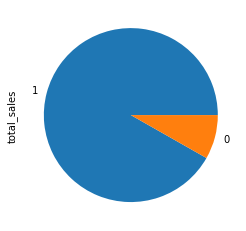

In [13]:
data.groupby("is_holiday").total_sales.mean().sort_values(ascending=False)[:5].plot.pie()

# Convert beginning_of_week to readable for model

In [14]:
print("Min data from dataset:" , data['beginning_of_week'].min())
print("MAX data from dataset:" , data['beginning_of_week'].max())

Min data from dataset: 2018-09-02
MAX data from dataset: 2020-06-14


In [15]:
data['beginning_of_week'] = pd.to_datetime( data['beginning_of_week'] , format='%Y-%m-%d')

In [16]:
import datetime
import pandas as pd
# make the new columns using string indexing
data['year'] = data['beginning_of_week'].dt.year
data['month'] = data['beginning_of_week'].dt.month
data['day'] = data['beginning_of_week'].dt.day


In [17]:
data['quarter']=pd.to_datetime(data['beginning_of_week']).dt.quarter
data['smester']=np.where(data.quarter.isin([1,2]), 1 , 2)
data['day_of_year']=pd.to_datetime(data['beginning_of_week']).dt.dayofyear
data['week_of_year']=pd.to_datetime(data.beginning_of_week).dt.weekofyear
data['day_in_Month']=pd.to_datetime(data['beginning_of_week']).dt.days_in_month

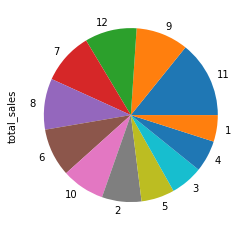

In [18]:
data.groupby("month").total_sales.mean().sort_values(ascending=False)[:12].plot.pie()

In [19]:
data['week_of_year'].value_counts().head(6)

52    288312
13    288312
23    288312
22    288312
21    288312
20    288312
Name: week_of_year, dtype: int64

In [20]:
# import platform,socket,re,uuid,json,psutil,logging

# def getSystemInfo():
#     try:
#         info={}
#         info['platform']=platform.system()
#         info['platform-release']=platform.release()
#         info['platform-version']=platform.version()
#         info['architecture']=platform.machine()
#         info['hostname']=socket.gethostname()
#         info['ip-address']=socket.gethostbyname(socket.gethostname())
#         info['mac-address']=':'.join(re.findall('..', '%012x' % uuid.getnode()))
#         info['processor']=platform.processor()
#         info['ram']=str(round(psutil.virtual_memory().total / (1024.0 **3)))+" GB"
#         return json.dumps(info)
#     except Exception as e:
#         logging.exception(e)

# json.loads(getSystemInfo())

# CHECK MISSING VALUE

In [21]:
data.isnull().sum()

total_sales             0
total_revenue           0
advertised_purchases    0
is_holiday              0
node                    0
dept_nbr                0
cl_nbr                  0
sub_cl_nbr              0
subclass_id             0
beginning_of_week       0
year                    0
month                   0
day                     0
quarter                 0
smester                 0
day_of_year             0
week_of_year            0
day_in_Month            0
dtype: int64

# channel Label Encoder

In [22]:
from sklearn import preprocessing 
def encoding(col):
    label_encod = preprocessing.LabelEncoder()
    data[col] = label_encod.fit_transform(data[col])
    return data[col].value_counts()

# encoding('channel')
encoding('day_of_year')
encoding('year')

    
# WALK-IN = 0
# webex_and_common = 1

1    7496112
2    3459744
0    2594808
Name: year, dtype: int64

# Convert subclass_id without dash on the data

In [23]:
# make string version of original column, call it 'col'
data['subclass_id'] = data['subclass_id'].str.replace(r'-', '').astype(int)
data['subclass_id'].head()

0    151010
1    151010
2    151010
3    151010
4    151010
Name: subclass_id, dtype: int64

# Add need column from data

In [24]:
# data_preprocess['total_revenue'] = data.total_revenue
# data_preprocess['advertised_purchases'] = data.advertised_purchases
data_preprocess = data

In [25]:
# del data_preprocess['total_revenue'], data_preprocess['advertised_purchases']

# Lag Features

In [27]:
lag_list = [1, 2 , 3]


for lag in lag_list:
    ft_name = ('advertise_shifted%s' % lag)
    data_preprocess[ft_name] = data['advertised_purchases'].shift(lag)
    # Fill the empty shifted features with 0
    data_preprocess[ft_name].fillna(0, inplace=True)
    
for lag in lag_list:
    ft_name = ('total_revenue_shifted%s' % lag)
    data_preprocess[ft_name] = data['total_revenue'].shift(lag)
    # Fill the empty shifted features with 0
    data_preprocess[ft_name].fillna(0, inplace=True)

# Rolling windows

In [28]:
# Min value
f_min = lambda x: x.rolling(window=3, min_periods=1).min()
# Max value
f_max = lambda x: x.rolling(window=5, min_periods=1).max()
# Mean value
f_mean = lambda x: x.rolling(window=7, min_periods=1).mean()
# Standard deviation
f_std = lambda x: x.rolling(window=9, min_periods=1).std()

function_list = [f_min, f_max, f_mean, f_std]
function_name = ['min', 'max', 'mean', 'std']

for i in range(len(function_list)):
    data_preprocess[('advertised_purchases_rolling_%s' % function_name[i])] = data.sort_values('beginning_of_week').groupby([ 'total_revenue'])['advertised_purchases'].apply(function_list[i])
    
data_preprocess.shape 


(13550664, 28)

In [29]:
# Min value
f_min = lambda x: x.rolling(window=3, min_periods=1).min()
# Max value
f_max = lambda x: x.rolling(window=5, min_periods=1).max()
# Mean value
f_mean = lambda x: x.rolling(window=7, min_periods=1).mean()
# Standard deviation
f_std = lambda x: x.rolling(window=9, min_periods=1).std()

function_list = [f_min, f_max, f_mean, f_std]
function_name = ['min', 'max', 'mean', 'std']

for i in range(len(function_list)):
    data_preprocess[('total_revenue_rolling_%s' % function_name[i])] = data.sort_values('beginning_of_week').groupby([ 'advertised_purchases'])['total_revenue'].apply(function_list[i])
    
data_preprocess.shape 


(13550664, 32)

# Expanding Features

In [30]:
ft_name = ('expand_total_revenue_mean')
data_preprocess[ft_name] = data['total_revenue'].expanding(3).mean()
# Fill the empty shifted features with 0
data_preprocess[ft_name].fillna(0, inplace=True)
    
    
ft_name = ('expand_total_revenue_sum')
data_preprocess[ft_name] = data['total_revenue'].expanding(3).sum()
# Fill the empty shifted features with 0
data_preprocess[ft_name].fillna(0, inplace=True)



In [31]:
ft_name = ('expand_advertised_purchases_mean')
data_preprocess[ft_name] = data['advertised_purchases'].expanding(3).mean()
# Fill the empty shifted features with 0
data_preprocess[ft_name].fillna(0, inplace=True)
    
    
ft_name = ('expand_advertised_purchases_sum')
data_preprocess[ft_name] = data['advertised_purchases'].expanding(3).sum()
# Fill the empty shifted features with 0
data_preprocess[ft_name].fillna(0, inplace=True)



# Lag Features

In [32]:
lag_list = [1, 2]


for lag in lag_list:
    ft_name = ('is_holiday_shifted%s' % lag)
    data_preprocess[ft_name] = data['is_holiday'].shift(lag)
    # Fill the empty shifted features with 0
    data_preprocess[ft_name].fillna(0, inplace=True)

In [33]:
lag_list = [1, 2]


for lag in lag_list:
    ft_name = ('node_shifted%s' % lag)
    data_preprocess[ft_name] = data['node'].shift(lag)
    # Fill the empty shifted features with 0
    data_preprocess[ft_name].fillna(0, inplace=True)

# Rolling Window Feature

In [34]:
# Min value
f_min = lambda x: x.rolling(window=3, min_periods=1).min()
# Max value
f_max = lambda x: x.rolling(window=5, min_periods=1).max()
# Mean value
f_mean = lambda x: x.rolling(window=7, min_periods=1).mean()
# Standard deviation
f_std = lambda x: x.rolling(window=9, min_periods=1).std()

function_list = [f_min, f_max, f_mean, f_std]
function_name = ['min', 'max', 'mean', 'std']

for i in range(len(function_list)):
    data_preprocess[('node_new_%s' % function_name[i])] = data.sort_values('beginning_of_week').groupby([ 'sub_cl_nbr'])['node'].apply(function_list[i])
    
data_preprocess.shape 



(13550664, 44)

# Expanding Window Feature

In [35]:
data_preprocess['expand_node__sum'] =  data['node'].expanding(3).sum()
data_preprocess[ft_name].fillna(0, inplace=True)
    
data_preprocess['expand_node__mean'] =  data['node'].expanding(3).mean()
data_preprocess[ft_name].fillna(0, inplace=True)

In [36]:
# from datetime import date
# start_day_last_year=datetime.datetime.now() - datetime.timedelta(days = 1*365)
# end_day_last_year=datetime.datetime.now() - datetime.timedelta(days = 1*240)
# print(start_day_last_year.strftime('%Y-%m-%d'))
# print(end_day_last_year.strftime('%Y-%m-%d'))

# mask = (data_preprocess['beginning_of_week'] > start_day_last_year) & (data_preprocess['beginning_of_week'] <= end_day_last_year)
# len(data_preprocess.loc[mask])

# Remove unuse column 

In [37]:
del data_preprocess['subclass_id'] , data_preprocess['dept_nbr'], data_preprocess['cl_nbr'], data_preprocess['sub_cl_nbr']

In [38]:
data_preprocess.describe().T

count          mean           std  \
total_sales                        13550664.0  5.659553e+00  2.357952e+01   
total_revenue                      13550664.0  3.437848e+01  1.229455e+02   
advertised_purchases               13550664.0  3.785171e+00  1.403406e+01   
is_holiday                         13550664.0  3.905609e-02  1.937285e-01   
node                               13550664.0  7.630657e+02  4.795945e+02   
year                               13550664.0  1.063830e+00  6.653828e-01   
month                              13550664.0  6.500000e+00  3.622477e+00   
day                                13550664.0  1.551064e+01  8.837475e+00   
quarter                            13550664.0  2.468085e+00  1.164201e+00   
smester                            13550664.0  1.468085e+00  4.989804e-01   
day_of_year                        13550664.0  4.650000e+01  2.713393e+01   
week_of_year                       13550664.0  2.618085e+01  1.572501e+01   
day_in_Month                       13550664.0  3.043617e+01  7.657358e-01   
advertise_shifted1                 13550664.0  3.785171e+00  1.403406e+01   
advertise_shifted2                 13550664.0  3.785171e+00  1.403406e+01   
advertise_shifted3                 13550664.0  3.785171e+00  1.403406e+01   
total_revenue_shifted1             13550664.0  3.437848e+01  1.229455e+02   
total_revenue_shifted2             13550664.0  3.437848e+01  1.229455e+02   
total_revenue_shifted3             13550664.0  3.437848e+01  1.229455e+02   
advertised_purchases_rolling_min   13550664.0  2.812375e+00  1.272084e+01   
advertised_purchases_rolling_max   13550664.0  5.445017e+00  1.608078e+01   
advertised_purchases_rolling_mean  13550664.0  3.813542e+00  1.370523e+01   
advertised_purchases_rolling_std   13227990.0  1.341386e+00  3.739170e+00   
total_revenue_rolling_min          13550664.0  2.025483e+01  8.840016e+01   
total_revenue_rolling_max          13550664.0  5.732162e+01  1.708505e+02   
total_revenue_rolling_mean         13550664.0  3.436900e+01  1.138880e+02   
total_revenue_rolling_std          13550146.0  1.792089e+01  4.655951e+01   
expand_total_revenue_mean          13550664.0  3.232065e+01  4.940612e+00   
expand_total_revenue_sum           13550664.0  2.280576e+08  1.346517e+08   
expand_advertised_purchases_mean   13550664.0  3.526114e+00  6.096714e-01   
expand_advertised_purchases_sum    13550664.0  2.503532e+07  1.484014e+07   
is_holiday_shifted1                13550664.0  3.905609e-02  1.937285e-01   
is_holiday_shifted2                13550664.0  3.905609e-02  1.937285e-01   
node_shifted1                      13550664.0  7.630657e+02  4.795945e+02   
node_shifted2                      13550664.0  7.630657e+02  4.795945e+02   
node_new_min                       13550664.0  3.776085e+02  2.761211e+02   
node_new_max                       13550664.0  1.309242e+03  4.187746e+02   
node_new_mean                      13550664.0  7.630669e+02  1.809811e+02   
node_new_std                       13550584.0  4.534038e+02  1.567359e+02   
expand_node__sum                   13550662.0  5.170431e+09  2.984886e+09   
expand_node__mean                  13550662.0  7.631814e+02  3.170091e-01   

                                           min           25%           50%  \
total_sales                           0.000000  0.000000e+00  0.000000e+00   
total_revenue                     -1526.760000  0.000000e+00  0.000000e+00   
advertised_purchases                  0.000000  0.000000e+00  0.000000e+00   
is_holiday                            0.000000  0.000000e+00  0.000000e+00   
node                                  7.000000  3.687500e+02  6.885000e+02   
year                                  0.000000  1.000000e+00  1.000000e+00   
month                                 1.000000  3.000000e+00  6.000000e+00   
day                                   1.000000  8.000000e+00  1.550000e+01   
quarter                               1.000000  1.000000e+00  2.000000e+00   
smester                  

# Normalization the features

In [40]:
from sklearn.preprocessing import MinMaxScaler
def MIN_MAX_SCALE(col):
    X = data_preprocess[[col]].values # Modify to Numpy
    min_max_sc = preprocessing.MinMaxScaler()
    X_Scale = min_max_sc.fit_transform(X)
    data_preprocess[col] = pd.DataFrame(X_Scale) # add to pandas DB

In [41]:
list_of_max_min = ['advertise_shifted1', 'advertise_shifted2', 'advertise_shifted3', 'total_revenue_shifted1', 
                   'total_revenue_shifted2', 'total_revenue_shifted3', 'advertised_purchases_rolling_min',
                   'advertised_purchases_rolling_max', 'advertised_purchases_rolling_mean', 'advertised_purchases_rolling_std', 
                   'total_revenue_rolling_min', 'total_revenue_rolling_max', 'total_revenue_rolling_mean', 'total_revenue_rolling_std', 
                   'expand_total_revenue_mean', 'expand_total_revenue_sum', 'expand_advertised_purchases_mean', 'expand_advertised_purchases_sum',
                    'node_shifted1', 'node_shifted2', 'node_new_min', 'node_new_max', 'node_new_mean', 
                   'node_new_std', 'expand_node__sum', 'expand_node__mean',  'total_revenue', 'advertised_purchases'
                  ]

for i in list_of_max_min:
    MIN_MAX_SCALE(i)

In [42]:
print(list(data_preprocess))

['total_sales', 'total_revenue', 'advertised_purchases', 'is_holiday', 'node', 'beginning_of_week', 'year', 'month', 'day', 'quarter', 'smester', 'day_of_year', 'week_of_year', 'day_in_Month', 'advertise_shifted1', 'advertise_shifted2', 'advertise_shifted3', 'total_revenue_shifted1', 'total_revenue_shifted2', 'total_revenue_shifted3', 'advertised_purchases_rolling_min', 'advertised_purchases_rolling_max', 'advertised_purchases_rolling_mean', 'advertised_purchases_rolling_std', 'total_revenue_rolling_min', 'total_revenue_rolling_max', 'total_revenue_rolling_mean', 'total_revenue_rolling_std', 'expand_total_revenue_mean', 'expand_total_revenue_sum', 'expand_advertised_purchases_mean', 'expand_advertised_purchases_sum', 'is_holiday_shifted1', 'is_holiday_shifted2', 'node_shifted1', 'node_shifted2', 'node_new_min', 'node_new_max', 'node_new_mean', 'node_new_std', 'expand_node__sum', 'expand_node__mean']


# Change columns name

In [44]:
data_preprocess.columns = ['total_sales' ,  'total_revenue', 
                           'advertised_purchases', 'is_holiday', 'node', 'beginning_of_week', 'year', 
                           'month', 'day', 'quarter', 'smester', 'day_of_year', 'week_of_year', 'day_in_Month', 
                           'advertise_shifted_one', 'advertise_shifted_two', 'advertise_shifted_three', 'total_revenue_shifted_one', 
                           'total_revenue_shifted_two', 'total_revenue_shifted_three', 'advertised_purchases_rolling_min', 'advertised_purchases_rolling_max', 
                           'advertised_purchases_rolling_mean', 'advertised_purchases_rolling_std', 'total_revenue_rolling_min',
                           'total_revenue_rolling_max', 'total_revenue_rolling_mean', 'total_revenue_rolling_std',
                           'expand_total_revenue_mean', 'expand_total_revenue_sum', 'expand_advertised_purchases_mean',
                           'expand_advertised_purchases_sum', 'is_holiday_shifted_one', 'is_holiday_shifted_two', 'node_shifted_one', 
                           'node_shifted_two', 'node_new_min', 'node_new_max', 'node_new_mean', 'node_new_std', 'expand_node__sum', 'expand_node__mean' ]


# Reindex our data

In [45]:
col=  [ 'total_revenue', 'advertised_purchases', 'is_holiday', 'node', 'beginning_of_week', 'year', 
    'month', 'day', 'quarter', 'smester', 'day_of_year', 'week_of_year', 'day_in_Month', 
    'advertise_shifted_one', 'advertise_shifted_two', 'advertise_shifted_three', 'total_revenue_shifted_one', 
    'total_revenue_shifted_two', 'total_revenue_shifted_three', 'advertised_purchases_rolling_min', 'advertised_purchases_rolling_max', 
                           'advertised_purchases_rolling_mean', 'advertised_purchases_rolling_std', 'total_revenue_rolling_min',
                           'total_revenue_rolling_max', 'total_revenue_rolling_mean', 'total_revenue_rolling_std',
                           'expand_total_revenue_mean', 'expand_total_revenue_sum', 'expand_advertised_purchases_mean',
                           'expand_advertised_purchases_sum', 'is_holiday_shifted_one', 'is_holiday_shifted_two', 'node_shifted_one', 
                           'node_shifted_two', 'node_new_min', 'node_new_max', 'node_new_mean', 'node_new_std', 'expand_node__sum', 'expand_node__mean',
      'total_sales' ]

data_preprocess = data_preprocess.reindex(columns=col)

In [46]:
print("Data Shape" , data_preprocess.shape)

Data Shape (13550664, 42)


In [66]:
data_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13550664 entries, 0 to 13550663
Data columns (total 41 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   total_revenue                      float64
 1   advertised_purchases               float64
 2   is_holiday                         int64  
 3   node                               int64  
 4   year                               int64  
 5   month                              int64  
 6   day                                int64  
 7   quarter                            int64  
 8   smester                            int64  
 9   day_of_year                        int64  
 10  week_of_year                       int64  
 11  day_in_Month                       int64  
 12  advertise_shifted_one              float64
 13  advertise_shifted_two              float64
 14  advertise_shifted_three            float64
 15  total_revenue_shifted_one          float64
 16  total_revenue_sh

# Create bigquery table

In [67]:
from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client()

# TODO(developer): Set table_id to the ID of the table to create.
table_id = "kohls-merch-in-lle.FUSE_LOCAL_TEST.PREDICTIONS_DEPT_15_543"


schema = [
bigquery.SchemaField("total_revenue", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("advertised_purchases", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("is_holiday", "INTEGER", mode="REQUIRED"),         
bigquery.SchemaField("node", "INTEGER", mode="REQUIRED"),       
bigquery.SchemaField("beginning_of_week", "TIMESTAMP", mode="REQUIRED"),
bigquery.SchemaField("year", "INTEGER", mode="REQUIRED"),         
bigquery.SchemaField("month", "INTEGER", mode="REQUIRED"),         
bigquery.SchemaField("day", "INTEGER", mode="REQUIRED"),         
bigquery.SchemaField("quarter", "INTEGER", mode="REQUIRED"),         
bigquery.SchemaField("smester", "INTEGER", mode="REQUIRED"),         
bigquery.SchemaField("day_of_year", "INTEGER", mode="REQUIRED"),         
bigquery.SchemaField("week_of_year", "INTEGER", mode="REQUIRED"),         
bigquery.SchemaField("day_in_Month", "INTEGER", mode="REQUIRED"),         
bigquery.SchemaField("advertise_shifted_one", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("advertise_shifted_two", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("advertise_shifted_three", "FLOAT", mode="REQUIRED"),       

bigquery.SchemaField("total_revenue_shifted_one", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("total_revenue_shifted_two", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("total_revenue_shifted_three", "FLOAT", mode="REQUIRED"),   

bigquery.SchemaField("advertised_purchases_rolling_min", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("advertised_purchases_rolling_max", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("advertised_purchases_rolling_mean", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("advertised_purchases_rolling_std", "FLOAT", mode="REQUIRED"),       

bigquery.SchemaField("total_revenue_rolling_min", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("total_revenue_rolling_max", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("total_revenue_rolling_mean", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("total_revenue_rolling_std", "FLOAT", mode="REQUIRED"),       

bigquery.SchemaField("expand_total_revenue_mean", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("expand_total_revenue_sum", "FLOAT", mode="REQUIRED"),   

bigquery.SchemaField("expand_advertised_purchases_mean", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("expand_advertised_purchases_sum", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("is_holiday_shifted_one", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("is_holiday_shifted_two", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("node_shifted_one", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("node_shifted_two", "FLOAT", mode="REQUIRED"),   
bigquery.SchemaField("node_new_min", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("node_new_max", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("node_new_mean", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("node_new_std", "FLOAT", mode="REQUIRED"),       
      
bigquery.SchemaField("expand_node__sum", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("expand_node__mean", "FLOAT", mode="REQUIRED"),       
bigquery.SchemaField("total_sales", "INTEGER", mode="REQUIRED"),         
]

table = bigquery.Table(table_id, schema=schema)
table = client.create_table(table)  # Make an API request.
print(
    "Created table {}.{}.{}".format(table.project, table.dataset_id, table.table_id)
)

Created table kohls-merch-in-lle.FUSE_LOCAL_TEST.PREDICTIONS_DEPT_15_543


# Write data to bigquery

In [ ]:
# pip install pandas-gbq

In [63]:
del data_preprocess['beginning_of_week']

In [ ]:
import pandas_gbq
data_preprocess.to_gbq( destination_table = 'FUSE_LOCAL_TEST.PREDICTIONS_DEPT_15_543'  
                       ,project_id='kohls-merch-in-lle' ,if_exists='append' )

0it [00:00, ?it/s]

In [ ]:
"Done"

# Save data to bucket

In [75]:
# number_of_chunks = 15
# for id, df_i in  enumerate(np.array_split(data_preprocess, number_of_chunks)):
#     # the `id` inside {} may be omitted,
#     # I also inserted the missing closing parenthesis
#     df_i.to_csv('gs://kohls-merch-fuse-dataload/Preprocessed_data/data_pre_{}.csv'.format(id) , index=False)

# ADD Test data from bigquery